In [5]:
from matplotlib import pyplot as plt
import numpy as np

# %matplotlib notebook
plt.rcParams["figure.figsize"] = [10, 10]

In [6]:
c = np.load("data/rectangle_clean/tc89_kcos.npy")
x = [e[0][0] for e in c]
y = [e[0][1] for e in c]

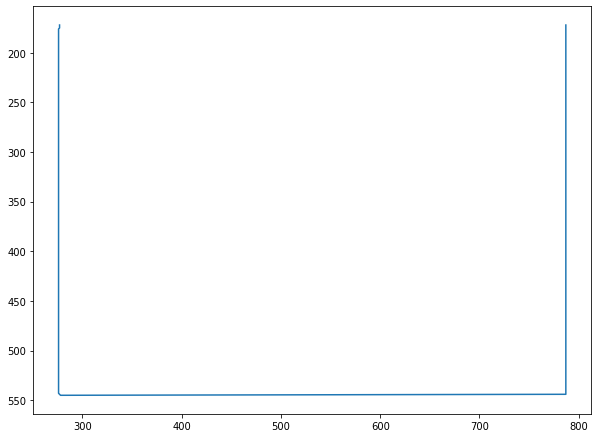

In [7]:
fix, ax = plt.subplots()
ax.set_aspect('equal')
ax.invert_yaxis()
_ = ax.plot(x, y)

In [8]:
import cv2 as cv
def make_contours():
    img = cv.imread("img/rectangle_clean.jpg")
    sv_lower = 200
    hsv_lower = (40, sv_lower, sv_lower)
    hsv_upper = (80, 255, 255)
    hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    inrange_mask = cv.inRange(hsv_img, hsv_lower, hsv_upper)

    contours, hierarchy = cv.findContours(inrange_mask, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
    contour = max(contours, key = cv.contourArea)
    np.save("data/rectangle_clean/none.npy", contour)

    contours, hierarchy = cv.findContours(inrange_mask, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key = cv.contourArea)
    np.save("data/rectangle_clean/simple.npy", contour)

    contours, hierarchy = cv.findContours(inrange_mask, cv.RETR_LIST, cv.CHAIN_APPROX_TC89_L1)
    contour = max(contours, key = cv.contourArea)
    np.save("data/rectangle_clean/tc89_l1.npy", contour)

    contours, hierarchy = cv.findContours(inrange_mask, cv.RETR_LIST, cv.CHAIN_APPROX_TC89_KCOS)
    contour = max(contours, key = cv.contourArea)
    np.save("data/rectangle_clean/tc89_kcos.npy", contour)